<a href="https://colab.research.google.com/github/sruthi2397/project/blob/master/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [17]:
data = pd.read_excel('dec22h.xlsx')
print(data.shape)
print(data.head())

(2125, 5)
   calling_party  0h to 5h  6h to 11h  12h to 17h  18h to 23h
0         131424       593       2478           0           0
1         131452      1102          0           0           0
2         131546      1428          0           0        2490
3         131609      1028       2617           0           0
4         131760         0          0           0         528


In [18]:
data.columns=['calling_party',0,1,2,3]
X=data.iloc[:,1:5]
print(X.head())

      0     1  2     3
0   593  2478  0     0
1  1102     0  0     0
2  1428     0  0  2490
3  1028  2617  0     0
4     0     0  0   528


In [19]:
from sklearn.model_selection import train_test_split
clus_train,clus_test=train_test_split(X,test_size=.3,random_state=123)
import collections
#from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples
pca = PCA(n_components = 4, random_state=1)
X_pca = pca.fit_transform(X)

print('Explained Variance Ratio : ' + str(pca.explained_variance_ratio_.cumsum()[1]))

Explained Variance Ratio : 0.8926528012578538


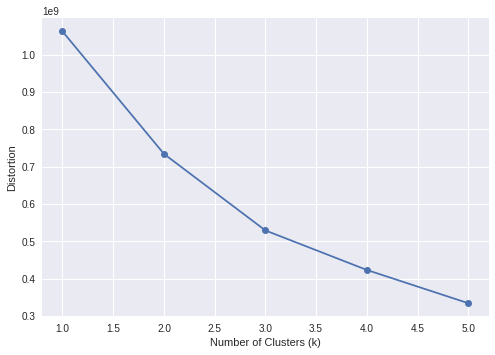

In [20]:
distortions = []
K_to_try = range(1, 6)

for i in K_to_try:
    model = KMeans(
            n_clusters=i,
            init='k-means++',
            # n_init=10,
            # max_iter=300,
            # n_jobs=-1,
            random_state=1)
    model.fit(X_pca)
    distortions.append(model.inertia_)

plt.plot(K_to_try, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.savefig("kcluster.png")
plt.show()

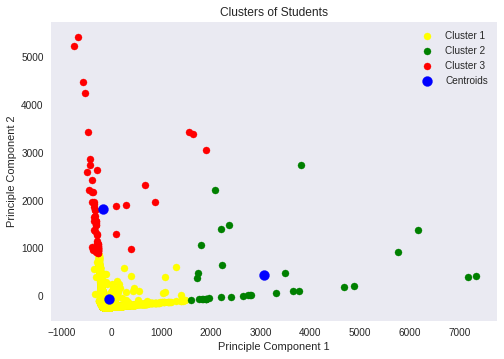

In [21]:
model = KMeans(
    n_clusters=3,
    init='k-means++',
    # n_init=10,
    # max_iter=300,
    # n_jobs=-1,
    random_state=1)

model = model.fit(X_pca)

y = model.predict(X_pca)

plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], s = 50, c = 'yellow', label = 'Cluster 1')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], s = 50, c = 'green', label = 'Cluster 2')
plt.scatter(X_pca[y == 2, 0], X_pca[y == 2, 1], s = 50, c = 'red', label = 'Cluster 3')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, c = 'blue', label = 'Centroids')
plt.title('Clusters of Students')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.legend()
plt.grid()
plt.savefig("kcluster2.png")
plt.show()

K Means Result : 
Counter({0: 2030, 2: 63, 1: 32})


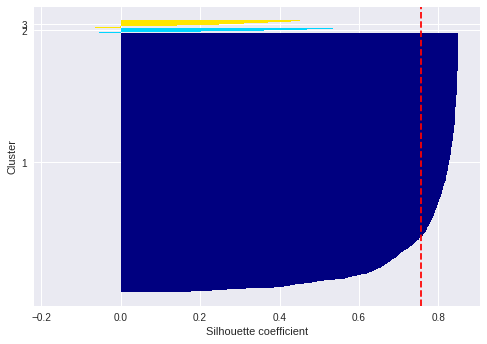

In [22]:
print('K Means Result : ')
print(collections.Counter(y))

cluster_labels = np.unique(y)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_pca, y, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.savefig("silhouette.png")
plt.show()

In [23]:
model_k = KMeans(
    n_clusters=3,
    init='k-means++',
    
    random_state=1)

# fit with X instead of X_pca
model_k = model_k.fit(X)

y_final = model_k.predict(X)
#from sklearn.externals import joblib
#joblib.dump(model_k,'model.pkl')

print('Final K Means Result (no PCA) : ')
print(collections.Counter(y_final))


Final K Means Result (no PCA) : 
Counter({0: 2030, 2: 63, 1: 32})


In [24]:
y_final = pd.DataFrame(y_final, columns=['cluster'])

raw_result = pd.concat([X, y_final], axis=1)

y = pd.DataFrame(y, columns=['cluster'])
raw_result_pca = pd.concat([X, y], axis=1)

# raw_result.to_csv('YOUR_PATH/output/raw_result.csv', index=False)
# raw_result_pca.to_csv('YOUR_PATH/output/raw_result_pca.csv', index=False)

mean_by_student_1 = raw_result[raw_result['cluster']==0].iloc[:, 0:28].mean(axis = 1)

mean_by_student_2 = raw_result[raw_result['cluster']==1].iloc[:, 0:28].mean(axis = 1)

mean_by_student_3 = raw_result[raw_result['cluster']==2].iloc[:, 0:28].mean(axis = 1)

print('Mean cluster 1 : ' + str(mean_by_student_1.mean()) + ',STD :' + str(mean_by_student_1.std()))
print('Mean cluster 2 : ' + str(mean_by_student_2.mean()) + ',STD :' + str(mean_by_student_2.std()))
print('Mean cluster 3 : ' + str(mean_by_student_3.mean()) + ',STD :' + str(mean_by_student_3.std()))

Mean cluster 1 : 71.80512315270933,STD :60.4800181932032
Mean cluster 2 : 744.4875000000002,STD :356.07248605105764
Mean cluster 3 : 513.1079365079364,STD :301.6456665722257
